In [1]:
#Import dependencies
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

import scipy.stats as sts
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress


# Data Cleanup and Exploration

1. Import of each year's hospital billed services data files and conversion to data frames
2. Clean up / reformatting of each year's hospital billed services data frame
3. Concat separate year hospital data frames into a master final hospital data frame
4. Import of each year's median income data files and convert to data frames
5. Concat separate year median income data frames into a master final median income data frame
6. Merge Hospital data frame with Median Income data frame by year and zip code

## 1. Import of each year's hospital billed services data files
### Raw data from Centers For Medicare And Medicaid Services (CMS)

#### Data Source: 
cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/

In [2]:
# Note: 2011-2013 represent top 100 billed services. 2014-2017 represent all billed services
data_2011= "data_cms_gov/Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv"
data_2012= "data_cms_gov/Medicare_Provider_Charge_Inpatient_DRG100_FY2012.csv"
data_2013= "data_cms_gov/Medicare_Provider_Charge_Inpatient_DRG100_FY2013.csv"
data_2014= "data_cms_gov/Medicare_Provider_Charge_Inpatient_DRGALL_FY2014.csv"
data_2015= "data_cms_gov/Medicare_Provider_Charge_Inpatient_DRGALL_FY2015.csv"
data_2016= "data_cms_gov/Medicare_Provider_Charge_Inpatient_DRGALL_FY2016.csv"
data_2017= "data_cms_gov/Medicare_Provider_Charge_Inpatient_DRGALL_FY2017.csv"

# Read School and Student Data File and store into Pandas Data Frames
data_2011_df = pd.read_csv(data_2011, low_memory=False)
data_2012_df = pd.read_csv(data_2012, low_memory=False)
data_2013_df = pd.read_csv(data_2013, low_memory=False)
data_2014_df = pd.read_csv(data_2014, low_memory=False)
data_2015_df = pd.read_csv(data_2015, low_memory=False)
data_2016_df = pd.read_csv(data_2016, low_memory=False)
data_2017_df = pd.read_csv(data_2017, low_memory=False)

data_2011_df.head()



,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37500,5434.958333,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28000,5417.560000,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27778,5658.333333,4851.444444


## 2. Clean up / reformatting of each year's hospital billed services data files

In [3]:
# Replace ">" with "+" in 2015, 2016 and 2017 dataframe values in DRG column 

data_2015_df = data_2015_df.replace({'871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC':
                                     '871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC'})
data_2016_df = data_2016_df.replace({'871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC':
                                     '871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC'})

data_2017_df = data_2017_df.replace({'871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC':
                                     '871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC'})


# Convert values in 'Total Discharges' and 'Average Covered Charges' columns to floats

data_2016_df["Total Discharges"] = pd.to_numeric(data_2016_df["Total Discharges"], errors='coerce')
data_2016_df = data_2016_df.dropna()
data_2016_df["Average Covered Charges"] = data_2016_df["Average Covered Charges"].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [4]:
#add year column to all individual year dataframes

data_2011_year_df = data_2011_df['Payment Year'] = 2011
data_2012_year_df = data_2012_df['Payment Year'] = 2012
data_2013_year_df = data_2013_df['Payment Year'] = 2013
data_2014_year_df = data_2014_df['Payment Year'] = 2014
data_2015_year_df = data_2015_df['Payment Year'] = 2015
data_2016_year_df = data_2016_df['Payment Year'] = 2016
data_2017_year_df = data_2017_df['Payment Year'] = 2017

## 3. Concat separate year hospital data frames into one data frame (final_hospital_df)


In [5]:
# Concat separate year data frames into one data frame (final_hospital_df)

final_hospital_df = data_2011_year_df
frames = [data_2011_df, data_2012_df,data_2013_df,data_2014_df,data_2015_df,data_2016_df,data_2017_df]
final_hospital_df = pd.concat(frames)
final_hospital_df = final_hospital_df.dropna(how='any')
final_hospital_df.count()

DRG Definition                                1272511
Provider Id                                   1272511
Provider Name                                 1272511
Provider Street Address                       1272511
Provider City                                 1272511
Provider State                                1272511
Provider Zip Code                             1272511
Hospital Referral Region (HRR) Description    1272511
Total Discharges                              1272511
Average Covered Charges                       1272511
Average Total Payments                        1272511
Average Medicare Payments                     1272511
Payment Year                                  1272511
dtype: int64

## 4. Import of each year's cleaned median income data files and convert to data frames


In [6]:
# Read in each year's median income data and merge into one data frame (all_income_df)

income_2011 = "data_median_income/final_2011_median_income.csv"
income_2012 = "data_median_income/final_2012_median_income.csv"
income_2013 = "data_median_income/final_2013_median_income.csv"
income_2014 = "data_median_income/final_2014_median_income.csv"
income_2015 = "data_median_income/final_2015_median_income.csv"
income_2016 = "data_median_income/final_2016_median_income.csv"
income_2017 = "data_median_income/final_2017_median_income.csv"

income_2011_df = pd.read_csv(income_2011, low_memory=False)
income_2012_df = pd.read_csv(income_2012, low_memory=False)
income_2013_df = pd.read_csv(income_2013, low_memory=False)
income_2014_df = pd.read_csv(income_2014, low_memory=False)
income_2015_df = pd.read_csv(income_2015, low_memory=False)
income_2016_df = pd.read_csv(income_2016, low_memory=False)
income_2017_df = pd.read_csv(income_2017, low_memory=False)



## 5. Concat separate year median income data frames into a master final median income data frame


In [7]:
# Merge all years' median income data frames into one (all_income_df)
all_income_df = income_2011_df
income_frames = [income_2011_df, income_2012_df, income_2013_df, income_2014_df, income_2015_df, income_2016_df, income_2017_df]
all_income_df = pd.concat(income_frames)

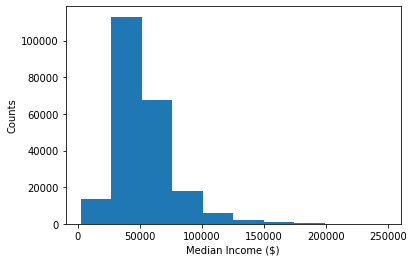

The average Median Income is $53,143
The standard deviation of Median Income is $22,612
Roughly 68% of Median Income is between 30530.412 and 75754.591
Roughly 95% of Median Income is between 7918.323 and 98366.681
Roughly 99.7% of Median Income is between 0 and 120978.77


In [8]:
# Visualization and Analysis of median income distribution across all zip codes

median_us_income = all_income_df['Median Income']
plt.hist(median_us_income)
plt.xlabel('Median Income ($)')
plt.ylabel('Counts')
plt.savefig('data_outputs/median_income_histogram.png')
plt.show()

mean_numpy = median_us_income.mean()
print(f"The average Median Income is ${mean_numpy:,.0f}")

sd_numpy = np.std(median_us_income,ddof = 0)
print(f"The standard deviation of Median Income is ${sd_numpy:,.0f}")

# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of Median Income is between {round(mean_numpy-sd_numpy,3)} and {round(mean_numpy+sd_numpy,3)}")
print(f"Roughly 95% of Median Income is between {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)}")
print(f"Roughly 99.7% of Median Income is between 0 and {round(mean_numpy+3*sd_numpy,3)}")

## 6. Merge hospital charge data (final_hospital_df) with median income data fram (all_income_df) 

In [9]:
# Merge hospital charge data (final_hospital_df) with median income data fram (all_income_df)
# Merge by Provider Zip Code and Year

all_income_df = all_income_df.rename(columns = {"Zip Code":"Provider Zip Code", "Year":"Payment Year"})

final_data_df = pd.merge(final_hospital_df, all_income_df, on=["Provider Zip Code", "Payment Year"])
final_data_df = final_data_df[['DRG Definition', 
                               'Provider Id', 
                               'Provider Zip Code', 
                               'Total Discharges',
                               'Average Covered Charges', 
                               'Payment Year', 
                               'Median Income']]


In [10]:
# Convert strings to floats in 'Provider Id' and 'Provider Zip Code' columns
final_data_df['Provider Id'] = final_data_df['Provider Id'].astype(str).replace('\.0', '', regex=True)
final_data_df['Provider Zip Code'] = final_data_df['Provider Zip Code'].astype(str).replace('\.0', '', regex=True)
final_data_df = final_data_df.dropna(how='any')
final_data_df.count()

DRG Definition             1155087
Provider Id                1155087
Provider Zip Code          1155087
Total Discharges           1155087
Average Covered Charges    1155087
Payment Year               1155087
Median Income              1155087
dtype: int64

# Analysis

1. Which 5 hospital procedures should be analyzed?
   
   a. Create data frame with only the 5 procedures chosen to be analyzed
   
   
2. What does the variability of the costs of the 5 procedures chosen look like?
   
   a. Histograms of average procedure costs.
   
   b. Boxplots of average procedure costs.
   

3. Is the average of 2011 hospital charges significantly different from the average of the 2011-2017 hospital charges? 


4. Is there a correlation between hospital charges and regional median income?

   a. Scatterplots and Linear regression between median income and average procedure costs


## 1. Analysis - Determining Most Performed Procedures by Year
#### Purpose - To choose final study groups

In [11]:
# 2011 top procedures performed
grouped_2011_df=data_2011_df.groupby(['DRG Definition'])
grouped_2011_counts_df=pd.DataFrame(grouped_2011_df[('Total Discharges')].sum())
grouped_2011_counts_df.sort_values("Total Discharges", ascending=False).head(8)

,Total Discharges
DRG Definition,
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,427207
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,319072
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",244854
292 - HEART FAILURE & SHOCK W CC,222038
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,206695
194 - SIMPLE PNEUMONIA & PLEURISY W CC,198390
291 - HEART FAILURE & SHOCK W MCC,185599
"641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC",153660


In [12]:
# 2012 top procedures performed
grouped_2012_df=data_2012_df.groupby(['DRG Definition'])
grouped_2012_counts_df=pd.DataFrame(grouped_2012_df[('Total Discharges')].sum())
grouped_2012_counts_df.sort_values("Total Discharges", ascending=False).head(8)

,Total Discharges
DRG Definition,
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,430717
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,345343
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",215483
292 - HEART FAILURE & SHOCK W CC,204069
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,195346
291 - HEART FAILURE & SHOCK W MCC,182445
194 - SIMPLE PNEUMONIA & PLEURISY W CC,180262
683 - RENAL FAILURE W CC,153170


In [13]:
# 2013 top procedures performed
grouped_2013_df=data_2013_df.groupby(['DRG Definition'])
grouped_2013_counts_df=pd.DataFrame(grouped_2013_df[('Total Discharges')].sum())
grouped_2013_counts_df.sort_values("Total Discharges", ascending=False).head(8)

,Total Discharges
DRG Definition,
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,444816.0
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,396451.0
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",197086.0
292 - HEART FAILURE & SHOCK W CC,196318.0
291 - HEART FAILURE & SHOCK W MCC,192040.0
194 - SIMPLE PNEUMONIA & PLEURISY W CC,181006.0
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,173271.0
683 - RENAL FAILURE W CC,150966.0


In [14]:
# 2014 top procedures performed
grouped_2014_df=data_2014_df.groupby(['DRG Definition'])
grouped_2014_counts_df=pd.DataFrame(grouped_2014_df[('Total Discharges')].sum())
grouped_2014_counts_df.sort_values("Total Discharges", ascending=False).head(8)

,Total Discharges
DRG Definition,
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,458259
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,438597
291 - HEART FAILURE & SHOCK W MCC,198889
292 - HEART FAILURE & SHOCK W CC,192918
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",190375
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,159823
194 - SIMPLE PNEUMONIA & PLEURISY W CC,148808
683 - RENAL FAILURE W CC,144145


In [15]:
# 2015 top procedures performed
grouped_2015_df=data_2015_df.groupby(['DRG Definition'])
grouped_2015_counts_df=pd.DataFrame(grouped_2015_df[('Total Discharges')].sum())
grouped_2015_counts_df.sort_values("Total Discharges", ascending=False).head(8)

,Total Discharges
DRG Definition,
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,521358
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,463930
291 - HEART FAILURE & SHOCK W MCC,221654
292 - HEART FAILURE & SHOCK W CC,192975
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",182443
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,150680
872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W/O MCC,150151
194 - SIMPLE PNEUMONIA & PLEURISY W CC,148886


In [16]:
# 2016 top procedures performed
grouped_2016_df=data_2016_df.groupby(['DRG Definition'])
grouped_2016_counts_df=pd.DataFrame(grouped_2016_df[('Total Discharges')].sum())
grouped_2016_counts_df.sort_values("Total Discharges", ascending=False).head(8)

,Total Discharges
DRG Definition,
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,530042.0
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,462826.0
291 - HEART FAILURE & SHOCK W MCC,233015.0
292 - HEART FAILURE & SHOCK W CC,181587.0
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",165908.0
872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W/O MCC,151092.0
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,144212.0
189 - PULMONARY EDEMA & RESPIRATORY FAILURE,142982.0


In [36]:
# 2017 top procedures performed
grouped_2017_df=data_2017_df.groupby(['DRG Definition'])
grouped_2017_counts_df=pd.DataFrame(grouped_2017_df[('Total Discharges')].sum())
grouped_2017_counts_df.sort_values("Total Discharges", ascending=False).head(15)


,Total Discharges
DRG Definition,
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,597736
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,510632
291 - HEART FAILURE & SHOCK W MCC,359442
190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC,215525
189 - PULMONARY EDEMA & RESPIRATORY FAILURE,165613
872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W/O MCC,157851
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",155843
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,138497
683 - RENAL FAILURE W CC,134011


## 1a - Create filtered dataframe with only the five procedures chosen: 

470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,  
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,  
392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC,  
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,  
194 - SIMPLE PNEUMONIA & PLEURISY W CC  

In [18]:
# Create dataframe (limit_df) with only the five procedures chosen
idx = np.where((final_data_df['DRG Definition']=='470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC') | \
               (final_data_df['DRG Definition']=='871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC') | \
               (final_data_df['DRG Definition']=='392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC') | \
               (final_data_df['DRG Definition']=='690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC') | \
               (final_data_df['DRG Definition']=='194 - SIMPLE PNEUMONIA & PLEURISY W CC') )
limit_df = final_data_df.loc[idx]
limit_df


,DRG Definition,Provider Id,Provider Zip Code,Total Discharges,Average Covered Charges,Payment Year,Median Income
16,194 - SIMPLE PNEUMONIA & PLEURISY W CC,10001,36301,107.0,21096.94393,2011,37710.0
57,"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DIS...",10001,36301,156.0,20609.24359,2011,37710.0
63,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,10001,36301,226.0,43444.03097,2011,37710.0
78,690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,10001,36301,64.0,20601.17188,2011,37710.0
85,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...,10001,36301,182.0,44643.01648,2011,37710.0
...,...,...,...,...,...,...,...
1155080,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,670120,79911,17.0,102977.64710,2017,91957.0
1155083,690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,670120,79911,23.0,47396.65217,2017,91957.0
1155084,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...,670120,79911,22.0,147342.18180,2017,91957.0
1155085,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,670122,77385,25.0,118123.00000,2017,88220.0


In [19]:
# Output limit_df to .csv (final_limit_data.csv) 
limit_df.to_csv('../final_limit_data.csv', index=False)

## 2. How variable are procedure costs across the US?

## 2a. Histograms - Number of Cases Based on Average Costs of Procedure in 2011

Allows us to visualize the distribution of costs for the same procedure 

In [20]:
# Creating data for each procedure alone

data_2011_only_DRG470_df = data_2011_df.loc[data_2011_df['DRG Definition'] ==\
                                         "470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC",:]
data_2011_only_DRG871_df = data_2011_df.loc[data_2011_df['DRG Definition'] ==\
                                         "871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC",:]
data_2011_only_DRG392_df = data_2011_df.loc[data_2011_df['DRG Definition'] ==\
                                         "392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",:]
data_2011_only_DRG690_df = data_2011_df.loc[data_2011_df['DRG Definition'] ==\
                                         "690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC",:]
data_2011_only_DRG194_df = data_2011_df.loc[data_2011_df['DRG Definition'] ==\
                                         "194 - SIMPLE PNEUMONIA & PLEURISY W CC",:]

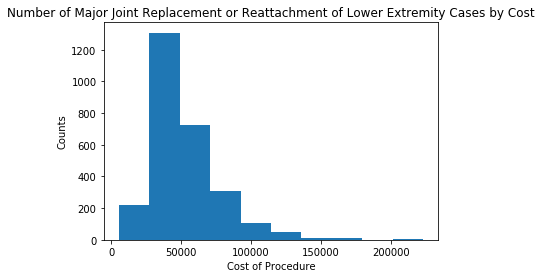

In [21]:
# Plot histogram for number of cases based on cost of procedure

plt.hist(data_2011_only_DRG470_df['Average Covered Charges'])
plt.xlabel('Cost of Procedure')
plt.ylabel('Counts')
plt.title('Number of Major Joint Replacement or Reattachment of Lower Extremity Cases by Cost')
plt.savefig('data_outputs/major_joint_replacement_counts_histogram.png')
plt.show()

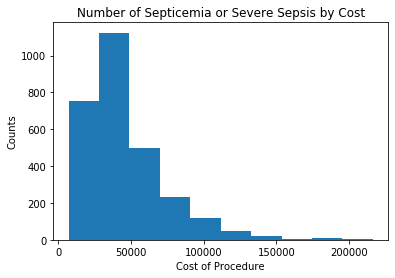

In [22]:
# Plot histogram for number of cases based on cost of procedure

plt.hist(data_2011_only_DRG871_df['Average Covered Charges'])
plt.xlabel('Cost of Procedure')
plt.ylabel('Counts')
plt.title('Number of Septicemia or Severe Sepsis by Cost')
plt.savefig('data_outputs/septecemia_counts_histogram.png')
plt.show()

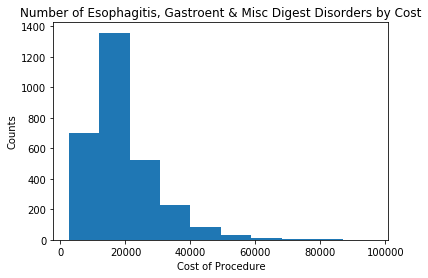

In [23]:
# Plot histogram for number of cases based on cost of procedure

plt.hist(data_2011_only_DRG392_df['Average Covered Charges'])
plt.xlabel('Cost of Procedure')
plt.ylabel('Counts')
plt.title('Number of Esophagitis, Gastroent & Misc Digest Disorders by Cost')
plt.savefig('data_outputs/esophagitis_counts_histogram.png')
plt.show()

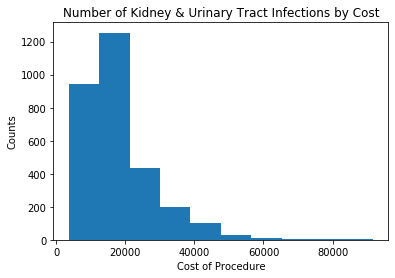

In [24]:
# Plot histogram for number of cases based on cost of procedure

plt.hist(data_2011_only_DRG690_df['Average Covered Charges'])
plt.xlabel('Cost of Procedure')
plt.ylabel('Counts')
plt.title('Number of Kidney & Urinary Tract Infections by Cost')
plt.savefig('data_outputs/kidney_and_urinary_tract_infections_counts_histogram.png')
plt.show()

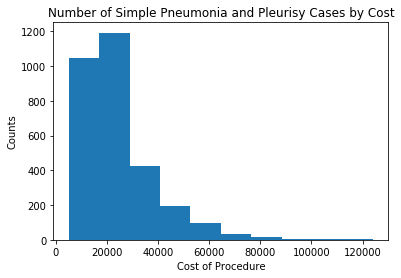

In [25]:
# Plot histogram for number of cases based on cost of procedure

plt.hist(data_2011_only_DRG194_df['Average Covered Charges'])
plt.xlabel('Cost of Procedure')
plt.ylabel('Counts')
plt.title('Number of Simple Pneumonia and Pleurisy Cases by Cost')
plt.savefig('data_outputs/simple_pneumonia_counts_histogram.png')
plt.show()

## 2b) Boxplots - 2011-2017 Average Costs Per Procedure

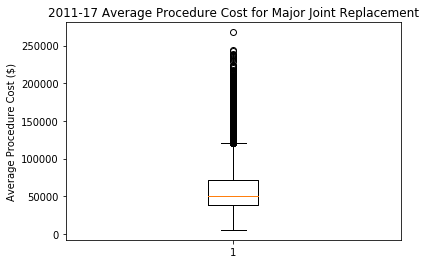

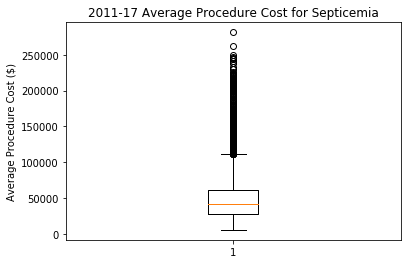

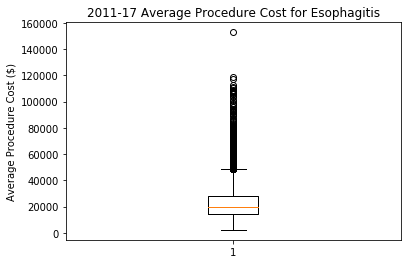

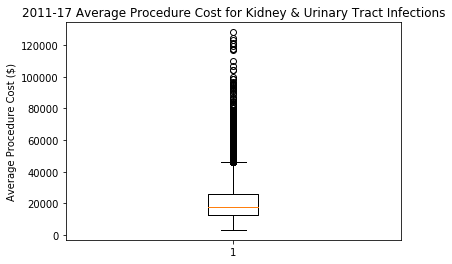

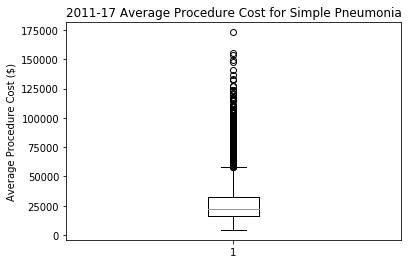

Average covered charge values above $121,088 could be outliers for procedure Major Joint Replacement.
Average covered charge values above $112,040 could be outliers for procedure Septicemia.
Average covered charge values above $48,770 could be outliers for procedure Esophagitis.
Average covered charge values above $46,095 could be outliers for procedure Kidney & Urinary Tract Infections.
Average covered charge values above $58,452 could be outliers for procedure Simple Pneumonia.


In [38]:
# Creating Box Plots and Determing Range for Potential Outliers in 2011
procedures = [470,871,392,690,194]
procedure_names = [
    '470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC',\
    '871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC',\
    '392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC',\
    '690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC',\
    '194 - SIMPLE PNEUMONIA & PLEURISY W CC']
short_procedure_names = [
    'Major Joint Replacement',
    'Septicemia',
    'Esophagitis',
    'Kidney & Urinary Tract Infections',
    'Simple Pneumonia'
]

png_procedure_names = [
    'major_joint_replacement',
    'septicemia',
    'esophagitis',
    'kidney_and_urinary_tract_infections',
    'simple_pneumonia'
]
upper_bounds=[]
lower_bounds=[]

for x in range(len(procedures)):
    average_charges_df = limit_df.loc[(limit_df['DRG Definition']==\
                        f'{procedure_names[x]}'),:]
    average_charges = average_charges_df['Average Covered Charges']

    fig1, ax1 = plt.subplots()
    ax1.set_title(f'2011-17 Average Procedure Cost for {short_procedure_names[x]}')
    ax1.set_ylabel('Average Procedure Cost ($)')
    ax1.boxplot(average_charges)
    plt.savefig(f'data_outputs/{png_procedure_names[x]}_average_cost_boxplot.png') #save png
    plt.show()
    
    quartiles = average_charges_df['Average Covered Charges'].quantile([.25,.5,.75])
    lowerq=quartiles[.25]
    upperq=quartiles[.75]
    iqr = upperq-lowerq
    upper_bound = upperq+(1.5*iqr)
    lower_bound = lowerq-(1.5*iqr)
    upper_bounds.append(upper_bound)
    lower_bounds.append(lower_bound)

for x in range(len(upper_bounds)):
    print(f"Average covered charge values above ${upper_bounds[x]:,.0f} could be outliers for procedure {short_procedure_names[x]}.")

## 3. Is the average of 2011 hospital charges significantly different from the average of the 2011-2017 hospital charges?
 

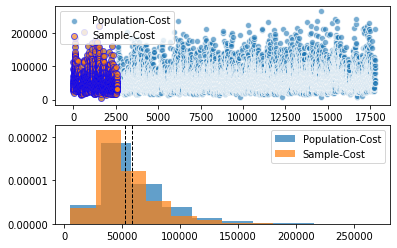

In [27]:
# Generate some data and show the scatter plot
population_470_df = final_data_df.loc[(final_data_df["DRG Definition"] == '470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC'),:]
population_cost = population_470_df["Average Covered Charges"] 
sample_470_df = limit_df.loc[(limit_df["DRG Definition"] == '470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC') & (final_data_df["Payment Year"] == 2011),:]
sample_cost = sample_470_df["Average Covered Charges"] 

plt.subplot(2, 1, 1)
plt.scatter(range(len(population_cost)), population_cost, label="Population-Cost", alpha=0.6, edgecolors='white')
plt.scatter(range(len(sample_cost)), sample_cost, label="Sample-Cost", alpha=0.6, edgecolors='blue')
plt.legend()

# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(population_cost, 10, density=True, alpha=0.7, label="Population-Cost")
plt.hist(sample_cost, 10, density=True, alpha=0.7, label="Sample-Cost")
plt.axvline(population_cost.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(sample_cost.mean(), color='k', linestyle='dashed', linewidth=1)
plt.savefig('data_outputs/ttest_2011_Joint_Replacement.png', dpi=300, bbox_inches='tight')
plt.legend()  

In [28]:
# Welch's t-test between Average Costs (2011-2017) and Average Costs(2011) 
# NULL=There is no significant difference between Average Procedure Costs (2011) and Average Procedure Costs (2011-2017)

stats.ttest_ind(population_cost, sample_cost, equal_var=False)

# Pvalue = 0, therefore, accept the null:  There is no significant difference between the two average costs.


Ttest_indResult(statistic=11.689469833374295, pvalue=5.046905234523456e-31)

## 4. Is there a correlation between hospital charges and regional median income?

### Scatterplots and Linear Regressions

In [29]:
#  Create a new df for each procedure from master dataframe

regress_470_df = limit_df.loc[limit_df["DRG Definition"] == '470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC',:]
regress_871_df = limit_df.loc[limit_df["DRG Definition"] == '871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC',:]
regress_392_df = limit_df.loc[limit_df["DRG Definition"] == '392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC',:]
regress_690_df = limit_df.loc[limit_df["DRG Definition"] == '690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC',:]
regress_194_df = limit_df.loc[limit_df["DRG Definition"] == '194 - SIMPLE PNEUMONIA & PLEURISY W CC',:]

The r-squared is: 0.00609550296223177


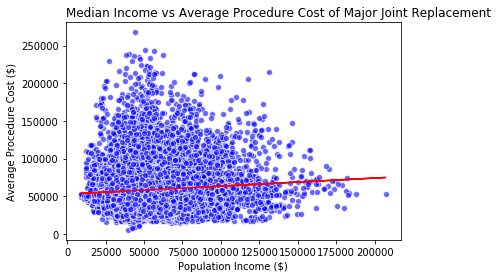

In [30]:
### Scatterplot of Median Income versus Average Procedure Cost of Major Joint Replacement (470)

#X axis = Median Income
#Y axis = Average Procedure Cost of Major Joint Replacement

x_values = regress_470_df['Median Income']
y_values = regress_470_df['Average Covered Charges']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "blue", alpha=0.6, edgecolors='white')
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Population Income ($)')
plt.ylabel('Average Procedure Cost ($)')
plt.title('Median Income vs Average Procedure Cost of Major Joint Replacement', loc='left')
plt.savefig('data_outputs/median_income_major_joint_replacement_regression.png')
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.03393217873078054


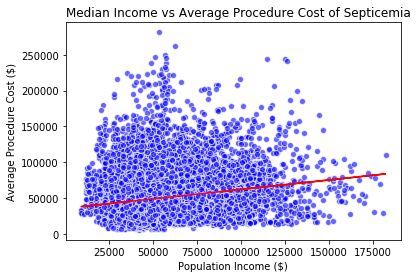

In [31]:
### Scatterplot of Median Income versus Average Procedure Cost of Septicemia (871)

#X axis = Median Income
#Y axis = Average Procedure Cost of Septicemia

x_values = regress_871_df['Median Income']
y_values = regress_871_df['Average Covered Charges']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "blue", alpha=0.6, edgecolors='white')
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Population Income ($)')
plt.ylabel('Average Procedure Cost ($)')
plt.title('Median Income vs Average Procedure Cost of Septicemia', loc='left')
plt.savefig('data_outputs/median_income_septicemia_regression.png')
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.043276861916724856


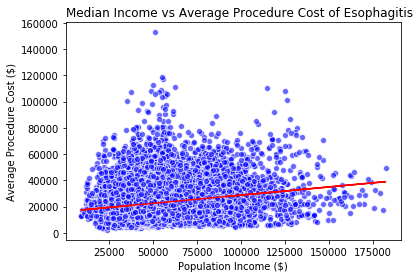

In [32]:
### Scatterplot of Median Income versus Average Procedure Cost of Esophagitis (392)

#X axis = Median Income
#Y axis = Average Procedure Cost of Esophagitis

x_values = regress_392_df['Median Income']
y_values = regress_392_df['Average Covered Charges']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "blue", alpha=0.6, edgecolors='white')
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Population Income ($)')
plt.ylabel('Average Procedure Cost ($)')
plt.title('Median Income vs Average Procedure Cost of Esophagitis', loc='left')
plt.savefig('data_outputs/median_income_major_esophagitis_regression.png')
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.04654284332600371


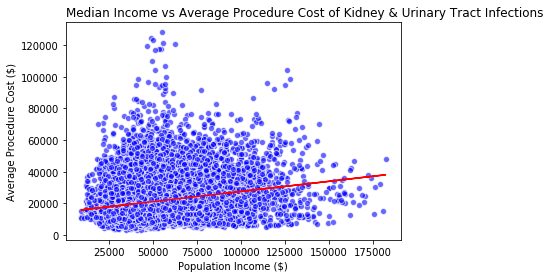

In [33]:
### Scatterplot of Median Income versus Average Procedure Cost of Kidney & Urinary Tract Infections (690)

#X axis = Median Income
#Y axis = Average Procedure Cost of Kidney & Urinary Tract Infections

x_values = regress_690_df['Median Income']
y_values = regress_690_df['Average Covered Charges']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "blue", alpha=0.6, edgecolors='white')
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Population Income ($)')
plt.ylabel('Average Procedure Cost ($)')
plt.title('Median Income vs Average Procedure Cost of Kidney & Urinary Tract Infections', loc='left')
plt.savefig('data_outputs/median_income_kidney_and_UTI_regression.png')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.03829877093903999


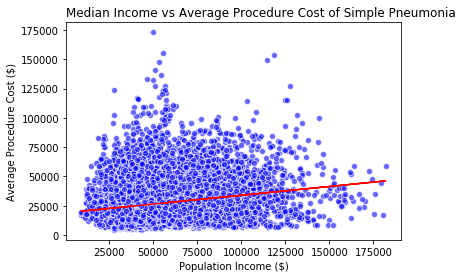

In [34]:
### Scatterplot of Median Income versus Average Procedure Cost of Kidney & Urinary Tract Infections (194)

#X axis = Median Income
#Y axis = Average Procedure Cost of Kidney & Urinary Tract Infections

x_values = regress_194_df['Median Income']
y_values = regress_194_df['Average Covered Charges']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "blue", alpha=0.6, edgecolors='white')
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Population Income ($)')
plt.ylabel('Average Procedure Cost ($)')
plt.title('Median Income vs Average Procedure Cost of Simple Pneumonia', loc='left')
plt.savefig('data_outputs/median_income_simple_pneumonia_regression.png')
print(f"The r-squared is: {rvalue**2}")
plt.show()

### Conclusion: There does not exist a correlation between the amounts charged by a hospital for a procedure and the median income of the regional area.